# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Danac, Nathan Gabriel\
_Student No._: 2021-12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Nathan Gabriel C. Danac**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

First, import all the necessary libraries.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as anim

Define our constants: the parameters for our electron and the infinite-potential box it's bound to.

In [1]:
#Define our constants
m = 9.109e-31 #kg
L = 1e-8 #m

hbar = 1.05e-34

x0 = L/2
sigma = 1e-10
kappa = 5e10

N = 1000
a = L/N
h = 1e-18

Given the Schrodinger equation, $$-\frac{\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2} = i\hbar\frac{\partial\Psi}{\partial t}$$
We can use Euler's method with both a forward time step $h$ and a reverse time step $-h$ and take their average to obtain the Crank-Nicolson equation, $$\Psi(x, t + h) - h\frac{i\hbar}{4ma^2}[\Psi(x + a, t + h) + \Psi(x - a, t + h) - 2\Psi(x, t + h)] = \Psi(x, t) + h\frac{i\hbar}{4ma^2}[\Psi(x + a, t) + \Psi(x - a, t) - 2\Psi(x, t)]$$
From our boundary conditions, $$\Psi(t) = \begin{pmatrix}\Psi(a, t)\\ \Psi(2a, t), \\ \vdots\end{\pmatrix}$$
Hence, we can rewrite the Crank-Nicolson equation as $$\begin{equation}\textbf{A}\Psi(t + h) = \textbf{B}\Psi(t)\end{equation}$$
where the matrices $\textbf{A}$ and $\textbf{B}$ are given by $$\textbf{A} = \begin{pmatrix} a_1 & a_2 \\ a_2 & a_1 & a_2 \\ & a_2 & a_1 & a_2 \\ & & & \ddots\end{pmatrix}$$ $$\textbf{B} = \begin{pmatrix} b_1 & b_2 \\ b_2 & b_1 & b_2 \\ & b_2 & b_1 & b_2 \\ & & & \ddots\end{pmatrix}$$
where
$$b_2 = h\frac{i\hbar}{4ma^2}$$
$$a_2 = -h\frac{i\hbar}{4ma^2} = -b_2$$
$$a_1 = 1 + h\frac{i\hbar}{2ma^2} = 1 + 2b_2$$
$$b_1 = 1 - h\frac{i\hbar}{4ma^2} = 1 + 2a_2$$
Given these matrices, we can solve the Crank-Nicolson equation using `sp.linalg.solve`.
Given the initial wavefunction, $$\Psi(x, 0) = \exp{\left[-\frac{(x - x_0)^2}{2\sigma^2}\right]}e^{i\kappa x}$$
We can solve for the first step of the Crank-Nicolson method.

In [ ]:
#Create the mesh representing the infinite potential box binding our electron
x = np.linspace(0, L, N)

#Define psi0 for all possible positions x within the box
psi0 = np.exp(-((x - x0)**2)/(2*sigma**2))*np.exp(1j*kappa*x)

#Define the elements of our matrices
b2 = h*(1j*hbar)/(4*m*a**2)
a2 = -b2
a1 = 1 + 2*b2
b1 = 1 + 2*a2

#Creating our matrices
a1d = np.full(N, a1) #Main diagonal
a2d = np.full(N - 1, a2) #Shifted diagonals
A = np.diag(a1d) + np.diag(a2d, 1) + np.diag(a2d, -1) #Creating the tridiagonal matrix

b1d = np.full(N, b1) #Main diagonal
b2d = np.full(N - 1, b2) #Shifted diagonals
B = np.diag(b1d) + np.diag(b2d, 1) + np.diag(b2d, -1) #Creating the tridiagonal matrix

#Obtaining the right-hand side of the Crank-Nicolson equation
v = B @ psi0

#Solving for Psi(t + h)
psi1 = sp.linalg.solve(A, v)

Next, we create a generating function for the Crank-Nicolson equation to obtain solutions $\Psi(x, t)$ to the time-dependent Schrodinger equation.

In [ ]:
def tdse(psi0, psi, skip):
  yield psi0
  i = 1
  while True:
    v = B @ psi0 #Get the right-hand side of the Crank-Nicolson equation
    psi0 = psi #Set Psi(t)
    psi = sp.linalg.solve(A, v) #Solve for Psi(t + h)
    if i % skip == 0: #(for animation) skip certain frames to save time
      yield psi
    i += 1

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


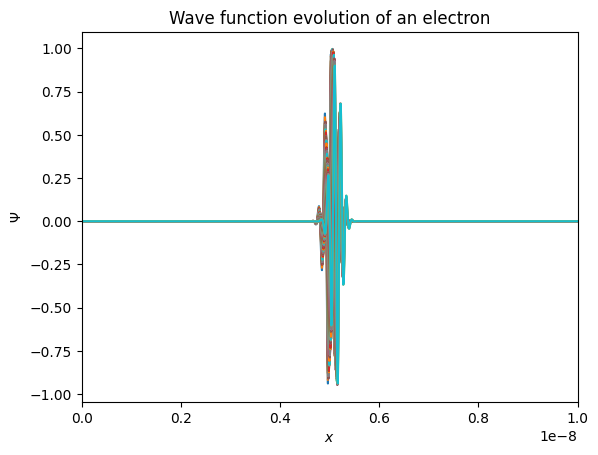

In [ ]:
data = tdse(psi0, psi1, 1) #Initializing our data generator

for i in range(250): #Test to see how our wave function behaves in the first 250 time steps
  if i % 5 == 0:
    plt.plot(x, next(data))

#Displaying our wave function
plt.xlim(0, L)
plt.title("Wave function evolution of an electron")
plt.ylabel("$\Psi$")
plt.xlabel("$x$")
plt.show()

Initially, our wave function is centered at the center of our infinite-potential box. It is also very likely to be found at the exact center, and the probability of finding it falls off very fast when you move to either the left or the right.

As time steps pass, the wave moves to the right, and the amplitudes shrink.

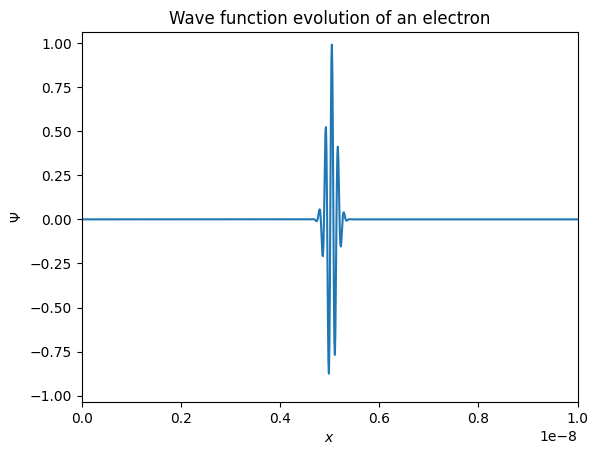

In [ ]:
#Format the figure
fig = plt.figure()
ax = plt.axes()
temp, = ax.plot(x,psi0)
data = tdse(psi0, psi1, 10)
ax.set_title("Wave function evolution of an electron")
ax.set_xlim(0, L)
ax.set_ylabel("$\Psi$")
ax.set_xlabel("$x$")

#Define the animation function
def plot(n):
    y = next(data) #Obtain the next step of the Crank-Nicolson method
    temp.set_ydata(y) #Plot the next step
    return temp,

plot_func = plot

#Animate
ani = anim.FuncAnimation(fig, plot_func, frames=1000, interval = 25, blit = True)

In [ ]:
from IPython.display import HTML
#Create a video depicting the evolution of the wave function
HTML(ani.to_html5_video())

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


From our initial wave function, it moves to the right initially and begins to shrink in magnitude.

As it reaches the right barrier of infinite potential, it is reflected towards the left. The wave begins to form an interference pattern with the component of the wave still moving rightwards. As a result, the wave travels towards the left with a slower phase velocity.

As it reaches the left barrier of infinite potential, the wave has no choice but to be reflected. Again, due to interference, the amplitude of the wave becomes smaller and the probability of finding it at different locations $x$ within the box becomes more evenly distributed.

Initially, we have a good idea where we can find the electron. In this case, it still behaves much like a particle with observable position. As the wave function begins to travel back and forth within the infinite-potential box, the electron becomes more and more like a wave. Due to interference, eventually there is an equal likelihood of finding it anywhere within the box, and the position cannot be so easily determined.